# Homework 1
## Javier Palomares
### September 22, 2019

## Problem 1

1. Watch: Vectors, what even are they? | Essence of linear algebra, Chapter 1 https://www.youtube.com/watch?v=fNk_zzaMoSs
2. Chapter 2 https://www.youtube.com/watch?v=k7RM-ot2NWY
In this video, in Minute 2:51, two vectors are written by their coordinates. Compute the
coordinates of the vector that is the sum of twice the first (left one) plus the second (right
one).

In [92]:
import numpy as np
first = np.array([-.8,1.3]);
second = np.array([3.1,-2.9]);
coordinates = 2*first + second
print(np.asarray(coordinates))

[ 1.5 -0.3]


Are the vectors $[1,1]$, $[1,0]$, $[0,1]$ linearly dependent?
Write the third as a linear combination of the first two.

The vector are not linearly independent. $[1,1]$ can be written as $[1,0] + [0,1]$ so it's a linear combination of the other two.
The third can be written as <br> $[0,1] = [1,1] - [1,0]$

3. Chapter 3 https://www.youtube.com/watch?v=kYB8IZa5AuE
At minute 6:36, a Matrix and a vector is given. Write down how this matrix transforms this
vector. Based on what you learned, write a matrix that rotates the 2D space by 90 degrees
clockwise.

In [26]:
A = np.array([[3, 2],
              [-2, 1]])
v = np.array([5,7])
np.matmul(A,v)

array([29, -3])

The matrix transforms the vector $[5,7]$ to $5 * [3,-2] + 7*[2,1]$ The matrix transforms vectors to linear combinations of $[3,-2]$ and $[2,1]$

The matrix $
\left(\begin{array}{cc} 
0 & 1\\
-1 & 0
\end{array}\right)$ rotates the 2D space by 90 degrees
clockwise.

4. Chapter 4 https://www.youtube.com/watch?v=XkY2DOUCWMU
At 3.34 a composition matrix is shown. Apply this Composition linear transformation to the
vector [1; 2]T and write the transformed vector.

In [37]:
composition_matrix= np.array([[1, -1],
              [1, 0]]);
v = np.array([1,2]);
np.matmul(composition_matrix,v)

array([-1,  1])

5. The determinant | Essence of linear algebra, chapter 6 https://www.youtube.com/watch?v=Ip3X9LOh2dk
In 9.40 there is a quiz question: Write your answer in one sentence.

TODO: Finish this

6. Dot products and duality | Essence of linear algebra, chapter 9 https://www.youtube.com/watch?v=LyGKycYT2v0

Project the vector $[1, 2, 3]^T$ on the vector $[1,1,1]$. Write the projected vector.

In [81]:
a = np.array([1,2,3])
b = np.array([1,1,1])
proj_a_b = np.dot(a,b) / np.linalg.norm(b) * b
print(proj_a_b)

[3.46410162 3.46410162 3.46410162]


Project the vector $[1, 2, 3]^T$ on the span of the vectors $[1, 0, 0]^T$ and $[1, 0, 0]^T$ . Write the
projected vector.

TODO: There is an error here

## Problem 2: Linear Algebra in Python. 
You can use all Python functions to solve this problem.

1. Consider the linear subspace $S = span(v1, v2, v3, v4)$ where $v1 = [1; 2; 3; 4]; v2 = [0; 1; 0; 1]; v3 =
[1; 4; 3; 6]; v4 = [2; 11; 6; 15]$. 

In [42]:
v1 = np.array([1,2,3,4])
v2 = np.array([0,1,0,1])
v3 = np.array([1,4,3,6])
v4 = np.array([2,11,6,15])

Create a vector inside S different from v1; v2; v3; v4. 

In [45]:
v1+v2+4*v3

array([ 5, 19, 15, 29])

Create a vector not in S.

$[0,0,0,1]$ is a vector not in $S$. It cannot be writtend as a linear combination of $v1,v2,v3,$ and $v4$

How would you check if a new vector is in S?

A vector $v$ is in S if there a consistent solution $a,b,c,d$ to $v = a * v1 + b * v2 + c * v3 + d * v4$

2. Find the dimension of the subspace S.

In [53]:
M = np.matrix([v1,v2,v3,v4]).transpose()

In [57]:
import sympy
_, inds = sympy.Matrix(M).T.rref() 
inds

(0, 1)

The first 2 vectors are linearly independent. The other 2 are linear combinations of the first 2. So the dimension of S is 2.

3. Find an orthonormal basis for the subspace S.

Since the first 2 vectors are independent, they form the basis for $S$. To find an orthonormal basis, we need to decompose $v_1$ and $v_2$ into orthonormal vectors $n_1$ and $n_2$

I'll let $n_1=\frac{v_2}{|v2|}$ then we need $n_2=a v_1+b v_2$ so that $n_1^T n_2 =0$ 

In [61]:
n1 = v2 /np.linalg.norm(v2)

Since we need $n_1^T n_2 =0$ we end up with needing a solution to $3a +b = 0$.
I'll use $a = -1, b = 3$ then normalize $n_2$

In [70]:
a = -1
b = 3
n2 = a *v1 + b * v2
n2 = n2/ np.linalg.norm(n2)

An orthonal basis for S is given by span(n1,n2)


In [78]:
print(n1)
print(n2)

[0.         0.70710678 0.         0.70710678]
[-0.28867513  0.28867513 -0.8660254  -0.28867513]


4. Solve the optimization problem $min_{x \epsilon S} ||x - z^*||_2$ where $z^* = [1, 0, 0, 0]$.

Since $x$ is in $S$, we can express x as $x = a n_1 + b n_2$
Then the optimization is to minimize

$$f = ||a n_1 + b n_2 - z^*||_2$$

$$f=|| a 
\left(\begin{array}{c} 
0 \\
1 \\
0 \\
1
\end{array}\right)
+ b 
\left(\begin{array}{c} 
-1 \\
1 \\
-3 \\
-1
\end{array}\right)
-
\left(\begin{array}{c} 
1 \\
0 \\
0 \\
0
\end{array}\right)
 || _2 $$
 
 
 $$f=|| 
\left(\begin{array}{c} 
-b-1 \\
a+b \\
-3b \\
a-b
\end{array}\right)
 || _2 $$

We can optimize $F=f^2$ to also find the optimum of $f$.
Taking the gradient of F, we find 

 $$\nabla F=
\left(\begin{array}{c} 
4a \\
22b +2 
\end{array}\right)
 $$
 Setting equal to zero, we find $a = 0, b = \frac{-1}{11}$
 So the optimal solution is at <br> $x = \frac{-1}{11}
\left(\begin{array}{c} 
-1 \\
1 \\
-3 \\
-1
\end{array}\right)$ 

5. (Tricky) Is there a relation of this optimization problem with linear regression? Discuss.

TODO: Finish

## Problem 3: Starting supervised learning in Kaggle.

1. Lets start with our first Kaggle submission in a playground regression competition. Make
an account to Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

2. Follow the data preprocessing steps from
https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models.
Then, split the data into a train and test set and fit a linear regression model (without any
regularization) to make predictions. Report the performance (RMSE) of this model on the
train set, the test set and on the Kaggle private leader board.
(Hint: remember to exponentiate np.expm1(ypred) your predictions).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

Data preprocessing:
We're not going to do anything fancy here:

* First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal
* Create Dummy variables for the categorical features
* Replace the numeric missing values (NaN's) with the mean of their respective columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cbc9b1dd8>,
      dtype=object)

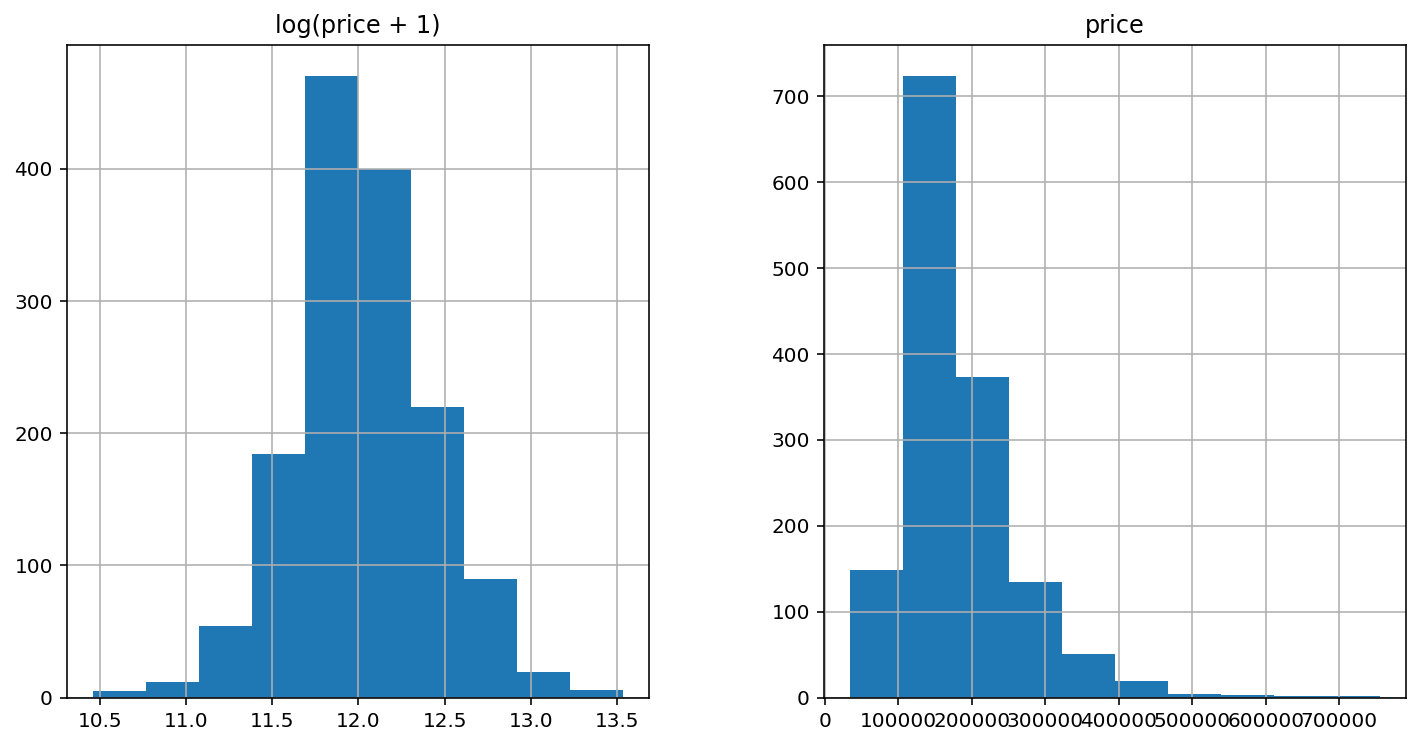

In [13]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [14]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [15]:
#one hot encode categorical columns
all_data = pd.get_dummies(all_data)

In [16]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [17]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y_train = train.SalePrice

### Models
First I'll train a linear regression without any regularization

In [32]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,LinearRegression
from sklearn.model_selection import cross_val_score

# function to compute the root mean squared error of the cross validation
def rmse_cv(model,X_train,y):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rms(predicted,target):
    return np.sqrt(np.mean((predicted-target)**2))

In [19]:
linear_model = LinearRegression()
# Train the model using the training sets
linear_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Make predictions using the training set
y_pred = linear_model.predict(X_train)
# we took a log of the sale price in the pre processing, so we need to exponentiate y_pred and y to get the true sale prices
y_pred_exp = np.expm1(y_pred)
y_exp = np.expm1(y_train)
rmse_linear = rms(y_pred_exp,y_exp)
print("A Linear Regression produced an rmse of ${} on the train set".format(rmse_linear))

A Linear Regression produced an rmse of $17717.98085215138 on the train set


In [18]:
# Now make predictions using the test set
y_pred = linear_model.predict(X_test)
# we took a log of the sale price in the pre processing, so we need to exponentiate y_pred and y to get the true sale prices
y_pred_exp = np.expm1(y_pred)

In [22]:
def print_predictions(filename,header,ids,y_pred):
    f = open(filename,'w')
    numRows = len(ids)
    f.write(header)
    for i in range(numRows):
        idNum = ids[i]
        y = y_pred[i]
        f.write("{},{}\n".format(idNum,y))
    f.close()

In [31]:
ids = test['Id']
print_predictions("linear_regression_prediction.csv",'Id,SalePrice\n',ids,y_pred_exp)

In [22]:
y_pred = linear_model.predict(X_train)
rmse_log = rms(y_pred,y_train)
print(rmse_log)

0.09163768908817964


This submission had an rmse on the logs of the sale prices of .5840. For comparison, the rms on the log of the training data was .0916.

![title](linear_submission.png)

3. Fit a ridge regression (i.e. using l − 2 regularization) using α = 0.1. Make a submission of
this prediction. Again, report train error, test error and your score/position on Kaggle LB.

In [20]:
alpha = .1
ridge_model = Ridge(alpha=alpha)
y = train.SalePrice
# fit the model then get the y predicted
ridge_model.fit(X_train,y)
y_pred = ridge_model.predict(X_train)
# we took a log of the sale price in the pre processing, so we need to exponentiate y_pred and y to get the true sale prices
y_pred_exp = np.expm1(y_pred)
y_exp = np.expm1(y)
rmse_ridge = rms(y_pred_exp,y_exp)
print("using alpha = 0.1, Ridge regression had an rmse of {}".format(rmse_ridge))

using alpha = 0.1, Ridge regression had an rmse of 17965.974938885876


The ridge model gives a  rmse in the Sale price of approximately 17965.97  when $\alpha=.1$

In [27]:
ids = test['Id']
print_predictions("ridge_prediction_alpha1.csv",'Id,SalePrice\n',ids,y_pred_exp)

![title](rr_alpha_01.png)

This submission had an rmse on the logs of the sale prices of .5695. Better than linear regression

4. Train a ridge regression and a lasso regression model. Optimize the alphas using cross validation. What is the best score you can get from a single ridge regression model and from a
single lasso model ? Report also the best hyperparameter α that you find.

##### Ridge regresion

In [33]:
n_alphas = 200
alphas = np.logspace(-5, 3, n_alphas).tolist()
cv_ridge_rmse = [rmse_cv(Ridge(alpha = alpha),X_train,y).mean() 
            for alpha in alphas]

Text(0, 0.5, 'RMSE')

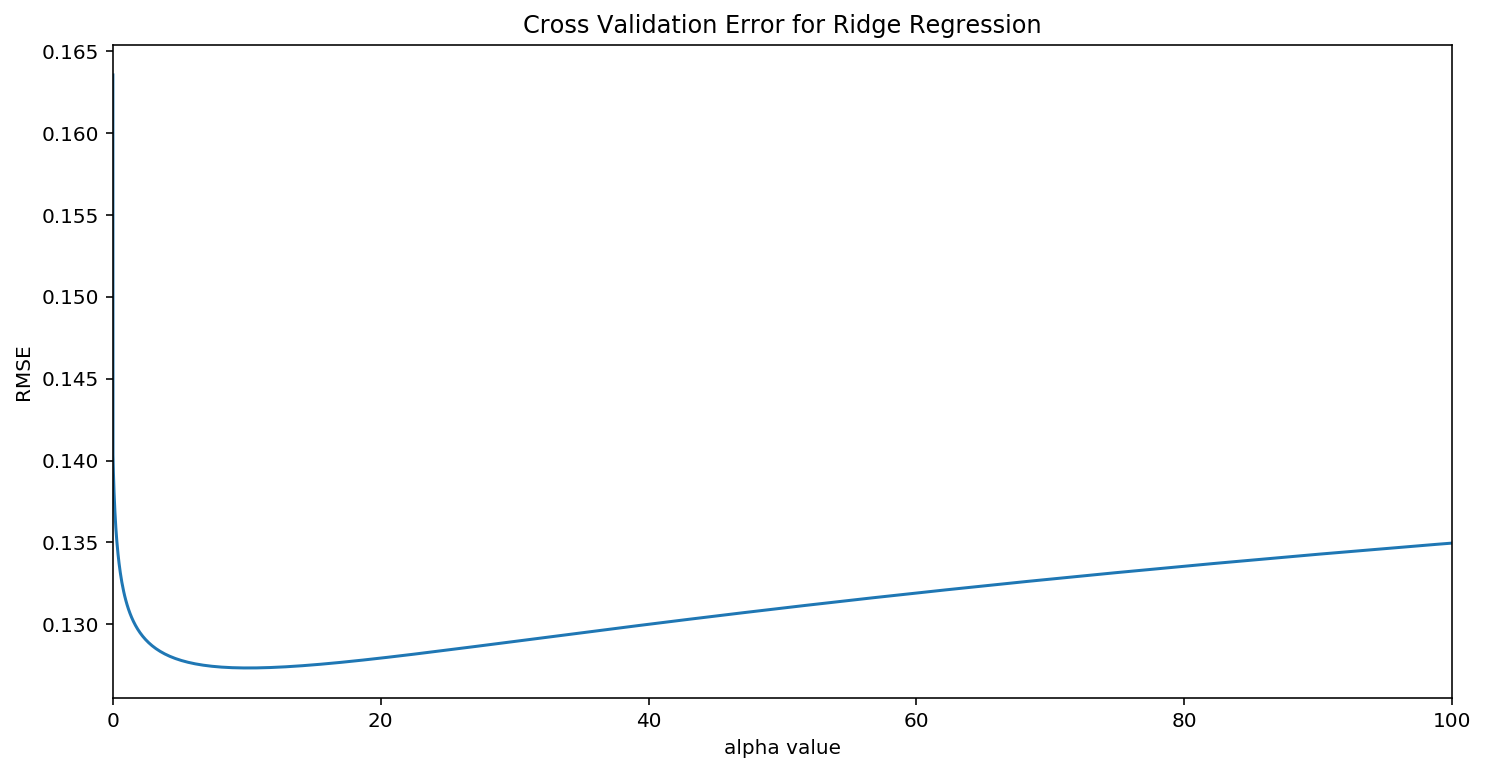

In [34]:
cv_ridge_rmse = pd.Series(cv_ridge_rmse, index = alphas)
cv_ridge_rmse.plot(title = "Cross Validation Error for Ridge Regression")
plt.xlabel("alpha value")
plt.xlim(0,100)
plt.ylabel("RMSE")

In [35]:
min_rmse_ridge = cv_ridge_rmse.min()
best_alpha_ridge = cv_ridge_rmse[cv_ridge_rmse==min_rmse_ridge].index[0]
print("The lowest cross validation RMSE for Ridge Regression is {} when alpha={}".format(min_rmse_ridge,best_alpha_ridge))

The lowest cross validation RMSE for Ridge Regression is 0.12733847319204644 when alpha=9.771241535346501


### Lasso

(-0.5, 0.5)

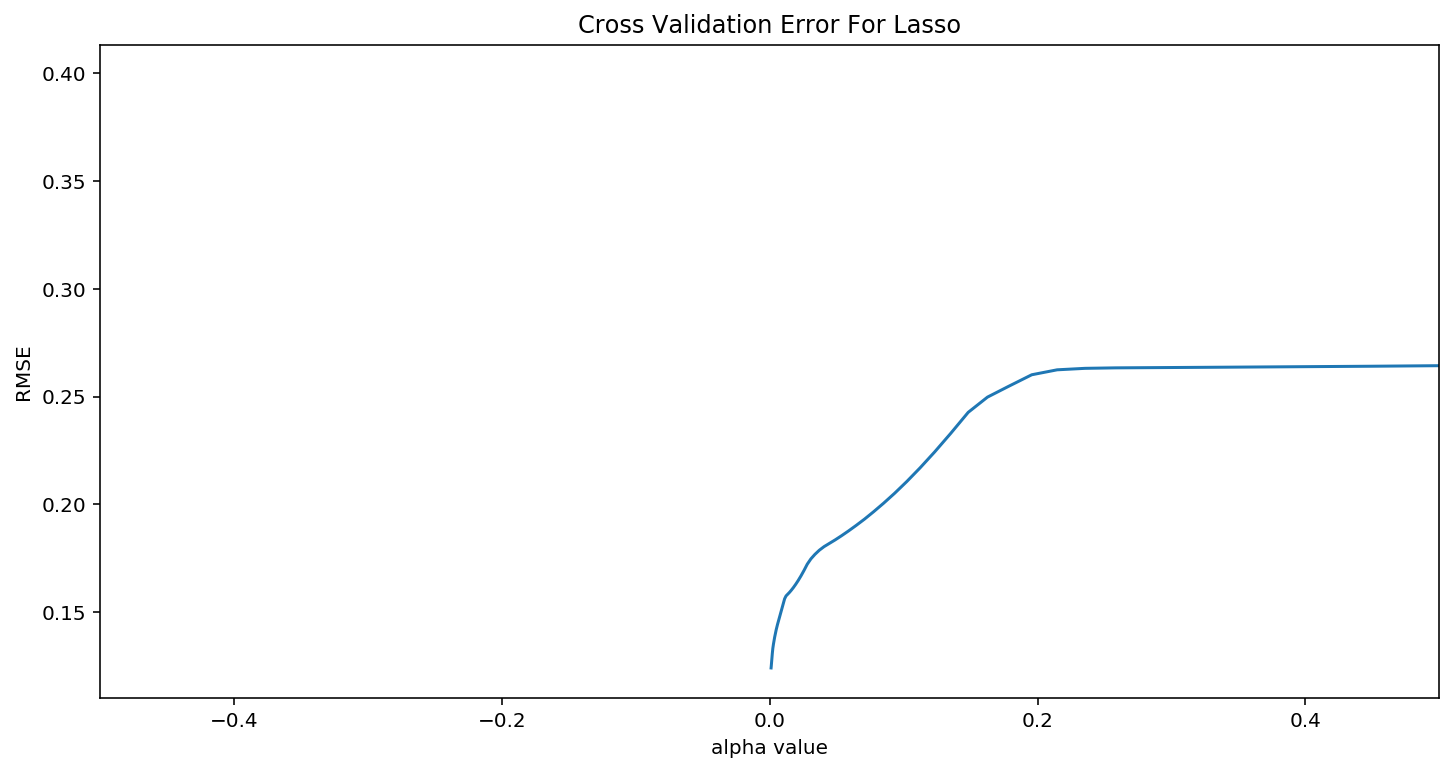

In [38]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso,LassoCV, LassoLarsCV
# the alphas in lasso are inverted from ridge
inv_alphas = np.ones(len(alphas)) /np.array(alphas)
cv_lasso_rmse = [rmse_cv(Lasso(alpha = alpha),X_train,y).mean() 
            for alpha in inv_alphas]
cv_lasso_rmse = pd.Series(cv_lasso_rmse, index = inv_alphas)
cv_lasso_rmse.plot(title = "Cross Validation Error For Lasso")
plt.xlabel("alpha value")
plt.ylabel("RMSE")
plt.xlim(-.5,.5)

In [40]:
min_rmse_lasso = cv_lasso_rmse.min()
best_alpha_lasso = cv_lasso_rmse[cv_lasso_rmse==min_rmse_lasso].index[0]
print("The lowest cross validation RMSE for Ridge Regression is {} when alpha={}".format(min_rmse_lasso,best_alpha_lasso))

The lowest cross validation RMSE for Ridge Regression is 0.12419498942266953 when alpha=0.001


In [41]:
# Create predictions with the best alpha scores for lasso and ridge
best_ridge = Ridge(alpha=best_alpha_ridge).fit(X_train,y)
best_lasso = Lasso(alpha=best_alpha_lasso).fit(X_train,y)

In [42]:
# exponentiate the prediction since we took the log of the sale price in the training data
y_pred_ridge = np.expm1(best_ridge.predict(X_test))
y_pred_lasso = np.expm1(best_lasso.predict(X_test))
ids = test['Id']

In [43]:
print_predictions("ridge_prediction.csv",'Id,SalePrice\n',ids,y_pred_ridge)
print_predictions("lasso_prediction.csv",'Id,SalePrice\n',ids,y_pred_lasso)